In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
retaildf = pd.read_csv('/Users/snehakarki/Downloads/RetailProj/new_retail_data.csv')
retaildf

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,...,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,...,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,...,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,...,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


## Exploratory Data Analysis - Data Preparation

This step includes handling missing values, erroneous values and checking for correct datatypes.


In [147]:
retaildf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [148]:
missing_values = retaildf.isnull().sum()
print(missing_values)


#dropping columns with excessive missing values or irrelevant features
columns_to_drop = ['Name', 'Email', 'Phone', 'Address', 'Zipcode', 'Country', 'Feedback', 'Ratings']
retaildf = retaildf.drop(columns=columns_to_drop)

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64


In [149]:
category_brand_type =  retaildf.groupby(['Product_Category', 'Product_Brand'])['Product_Type'].unique().reset_index()

# Display the results
print(category_brand_type)

# To get a count of product types for each category and brand
category_brand_type_count = retaildf.groupby(['Product_Category', 'Product_Brand', 'Product_Type']).size().reset_index(name='Count')

print("\nDetailed view with counts:")
print(category_brand_type_count)


   Product_Category      Product_Brand                          Product_Type
0             Books      HarperCollins      [Non-Fiction, Thriller, Fiction]
1             Books      Penguin Books    [Children's, Non-Fiction, Fiction]
2             Books       Random House    [Non-Fiction, Literature, Fiction]
3          Clothing             Adidas              [T-shirt, Shoes, Jacket]
4          Clothing               Nike              [Shorts, Shoes, T-shirt]
5          Clothing               Zara                 [Shirt, Dress, Jeans]
6       Electronics              Apple          [Tablet, Laptop, Smartphone]
7       Electronics           BlueStar                         [BlueStar AC]
8       Electronics         Mitsubhisi  [Mitsubishi 1.5 Ton 3 Star Split AC]
9       Electronics            Samsung      [Tablet, Television, Smartphone]
10      Electronics               Sony  [Headphones, Smartphone, Television]
11      Electronics          Whirepool                              [Fridge]

The Product brands like Zara, Nike, Harper Collins, etc. have been placed under the category 'Electronics' which might cause an issue with our modeling and analysis process. So, In this next step, each brand is mapped to the ideal category to prevent any misinterpretation.  

In [150]:
brand_category_map = {
    'Adidas': 'Clothing',
    'Nike': 'Clothing',
    'Zara': 'Clothing',
    'Apple': 'Electronics',
    'BlueStar': 'Electronics',
    'Samsung': 'Electronics',
    'Sony': 'Electronics',
    'HarperCollins': 'Books',
    'Penguin Books': 'Books',
    'Random House': 'Books',
    'Coca-Cola': 'Grocery',
    'Nestle': 'Grocery',
    'Pepsi': 'Grocery',
    'Bed Bath & Beyond': ['Electronics', 'Home Decor'],
    'Home Depot': ['Electronics', 'Home Decor'],
    'IKEA': ['Electronics', 'Home Decor'],
    'Mitsubhisi': 'Electronics',
    'Whirepool': 'Electronics'
}

# Function to correct the category
def correct_category(row):
    brand = row['Product_Brand']
    if brand in brand_category_map:
        correct_category = brand_category_map[brand]
        if isinstance(correct_category, list):
            # Handle brands with multiple possible categories
            if row['Product_Category'] in correct_category:
                return row['Product_Category']
            return correct_category[0]
        return correct_category
    return row['Product_Category']

# Apply the correction
retaildf['Corrected_Category'] = retaildf.apply(correct_category, axis=1)

# Display the rows where corrections were made
corrections = retaildf[retaildf['Product_Category'] != retaildf['Corrected_Category']]
print("Corrected categorizations:")
print(corrections[['Product_Category', 'Corrected_Category', 'Product_Brand', 'Product_Type']])

# Update the original Product_Category column
retaildf['Product_Category'] = retaildf['Corrected_Category']

# Remove the temporary Corrected_Category column
retaildf = retaildf.drop('Corrected_Category', axis=1)

# Verify the changes
print("\nUpdated categorizations:")
print(retaildf)

Corrected categorizations:
       Product_Category Corrected_Category  Product_Brand Product_Type
262                 NaN            Grocery         Nestle    Chocolate
437                 NaN              Books  HarperCollins  Non-Fiction
3343                NaN        Electronics        Samsung   Television
3551                NaN           Clothing         Adidas       Jacket
3838                NaN        Electronics     Home Depot  Decorations
...                 ...                ...            ...          ...
297962              NaN        Electronics        Samsung   Television
298089              NaN        Electronics        Samsung       Tablet
300585              NaN           Clothing         Adidas       Jacket
301192              NaN              Books   Random House  Non-Fiction
301303              NaN           Clothing         Adidas       Jacket

[283 rows x 4 columns]

Updated categorizations:
        Transaction_ID  Customer_ID        City            State   Age 

In [151]:
# Fill missing values in categorical features with mode
categorical_features = ['City', 'State', 'Gender', 'Customer_Segment', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Product_Category', 'Product_Brand', 'Month']
for col in categorical_features:
    retaildf[col].fillna(retaildf[col].mode()[0], inplace=True)

# Fill missing values in numerical features with median
numerical_features = ['Age', 'Total_Purchases', 'Amount', 'Total_Amount', 'Transaction_ID', 'Customer_ID', 'Year']
for col in numerical_features:
    retaildf[col].fillna(retaildf[col].median(), inplace=True)

# Fill missing values in Date and Time with forward fill method
retaildf['Date'].fillna(method='ffill', inplace=True)
retaildf['Time'].fillna(method='ffill', inplace=True)


In [152]:
import datetime as dt
# List of columns to convert to int
columns_to_int = ['Transaction_ID', 'Customer_ID', 'Age', 'Total_Purchases']

# Convert the columns to int
for column in columns_to_int:
    retaildf[column] = retaildf[column].astype(int)

retaildf['Total_Amount'] = retaildf['Total_Amount'].astype(float).round(2)
retaildf['Amount'] = retaildf['Amount'].astype(float).round(2)

#time related columns
retaildf['Year'] = retaildf['Year'].astype(int)
#retaildf['Month'] = retaildf['Month'].astype(int) - string values: Jan - Dec

retaildf['Date'] = pd.to_datetime(retaildf['Date'])
#retaildf['Time'] = pd.to_timedelta(retaildf['Time'])

# Display the first few rows to check the conversion
retaildf.head()

# Reference date
current_date = dt.datetime.now()

# Check for unique Customer_IDs
unique_customers = retaildf['Customer_ID'].nunique()
total_customers = retaildf.shape[0]

print(f"Total Customers: {total_customers}")
print(f"Unique Customer_IDs: {unique_customers}")

if unique_customers == total_customers:
    print("Each row represents a unique customer.")
else:
    print("There are duplicate Customer_IDs in the dataset.")

Total Customers: 302010
Unique Customer_IDs: 86766
There are duplicate Customer_IDs in the dataset.


### Filtering data based on Category = Clothing

For our initial analysis and insight generation for **Loki**, a retail startup, we will focus on a single product category: Clothing. To achieve this, we'll filter our dataframe to include only the rows related to clothing items. This focused approach will allow us to derive more specific and actionable insights for this particular segment of **Loki**'s business.

In [153]:
# Filter the dataset for Clothing category 
clothing_df = retaildf[retaildf['Product_Category'] == 'Clothing']
clothing_df

,Transaction_ID,Customer_ID,City,State,Age,Gender,Income,Customer_Segment,Date,Year,...,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Shipping_Method,Payment_Method,Order_Status,products
0,8691788,37249,Dortmund,Berlin,21,Male,Low,Regular,2023-09-18,2023,...,3,108.03,324.09,Clothing,Nike,Shorts,Same-Day,Debit Card,Shipped,Cycling shorts
7,2344675,26603,Munich,Berlin,29,Male,Medium,Premium,2023-03-24,2023,...,1,46.59,46.59,Clothing,Zara,Shirt,Same-Day,Cash,Processing,Dress shirt
14,2401331,98300,Portsmouth,England,32,Female,High,Regular,2023-11-18,2023,...,6,297.73,1786.36,Clothing,Adidas,T-shirt,Same-Day,Cash,Shipped,V-neck tee
30,3413296,98256,Portsmouth,England,26,Female,Low,Regular,2024-02-06,2024,...,3,159.80,479.41,Clothing,Adidas,Shoes,Same-Day,Debit Card,Pending,Running shoes
36,8783109,65305,Portsmouth,England,19,Male,High,Regular,2023-12-12,2023,...,5,195.55,977.76,Clothing,Zara,Shirt,Express,Credit Card,Pending,Henley shirt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301983,7311430,40897,Gold Coast,New South Wales,60,Female,High,Premium,2023-11-18,2023,...,10,35.13,351.33,Clothing,Nike,T-shirt,Same-Day,Cash,Delivered,Plain tee
301988,1554068,72401,Bielefeld,Berlin,27,Male,Low,Premium,2023-06-16,2023,...,10,172.96,1729.57,Clothing,Zara,Dress,Express,Cash,Shipped,Fit and flare dress
301995,5781099,41133,Nuremberg,Berlin,30,Female,High,Premium,2023-09-09,2023,...,2,51.47,102.94,Clothing,Adidas,T-shirt,Standard,Cash,Processing,Scoop neck tee
302004,4833982,94117,Charlotte,Missouri,54,Male,High,New,2023-10-14,2023,...,5,472.42,2362.12,Clothing,Nike,Shorts,Standard,Cash,Delivered,Chino shorts


In [154]:
#Calculating Recency, Frequency and Monetary Scores

# Calculate recency
recency_df = clothing_df.groupby('Customer_ID').Date.max().reset_index()
recency_df['Recency'] = (current_date - recency_df['Date']).dt.days
recency_df.drop('Date', axis=1, inplace=True)

# Calculate frequency
frequency_df = clothing_df.groupby('Customer_ID').Transaction_ID.nunique().reset_index()
frequency_df.columns = ['Customer_ID', 'Frequency']

## Calculate Monetary Score
monetary_df = clothing_df.groupby('Customer_ID').Total_Amount.sum().reset_index()
monetary_df.columns = ['Customer_ID', 'Monetary']

#Combining RFM Metrics
rfm_df = recency_df.merge(frequency_df, on='Customer_ID').merge(monetary_df, on='Customer_ID')
rfm_df

,Customer_ID,Recency,Frequency,Monetary
0,10000,246,1,1498.69
1,10001,287,1,3879.54
2,10003,371,1,1890.74
3,10006,159,4,7115.49
4,10007,202,2,2868.76
...,...,...,...,...
40803,99993,185,1,195.46
40804,99994,223,2,2100.92
40805,99995,243,1,1552.72
40806,99996,442,2,3248.06


In [155]:
rfm_df.Frequency.value_counts()

# Identify the customer(s) with 56 purchases - this is an unusual pattern and might skew our model prediction
outliers = rfm_df[rfm_df['Frequency'] == 56]

# Print the outliers to verify
print(outliers)

# Remove the customer(s) with 56 purchases from the dataset
rfm_df= rfm_df[rfm_df['Frequency'] != 56]

# Verify the removal
print(rfm_df['Frequency'].value_counts())

       Customer_ID  Recency  Frequency  Monetary
20407        55012      145         56   70146.0
1    29823
2     8838
3     1812
4      289
5       42
6        2
7        1
Name: Frequency, dtype: int64


In [162]:
#defined the scale on our own!
def recency_score(recency):
     if recency > 365: #more than a year ago
        return 1
     elif 270 < recency <= 365:
        return 2
     elif 180 < recency <= 270:
        return 3
     elif 90 < recency <= 180:
        return 4
     else:
        return 5

def frequency_score(purchases):
    if purchases == 1:
        return 1
    elif purchases in [2,3]:
        return 2
    elif purchases in [4,5]:
        return 3
    elif purchases in [6,7]:
        return 4
    else:
        return 5

def monetary_score(amount):
     if amount <= 100:
        return 1
     elif amount <= 500:
        return 2
     elif amount <= 1000:
        return 3
     elif amount <= 5000:
        return 4
     else:
        return 5

# Apply custom interval functions
rfm_df = rfm_df.assign(
    Recency_Score=rfm_df['Recency'].apply(recency_score),
    Frequency_Score=rfm_df['Frequency'].apply(frequency_score),
    Monetary_Score=rfm_df['Monetary'].apply(monetary_score)
)
# Combine scores into a single DataFrame
rfm_df['RFM_Score'] = rfm_df[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].apply(lambda x: str(x['Recency_Score']) + str(x['Frequency_Score']) + str(x['Monetary_Score']), axis=1)
rfm_df


,Customer_ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Cluster
0,10000,246,1,1498.69,3,1,4,314,4
1,10001,287,1,3879.54,2,1,4,214,1
2,10003,371,1,1890.74,1,1,4,114,1
3,10006,159,4,7115.49,4,3,5,435,2
4,10007,202,2,2868.76,3,2,4,324,2
...,...,...,...,...,...,...,...,...,...
40803,99993,185,1,195.46,3,1,2,312,0
40804,99994,223,2,2100.92,3,2,4,324,2
40805,99995,243,1,1552.72,3,1,4,314,4
40806,99996,442,2,3248.06,1,2,4,124,5


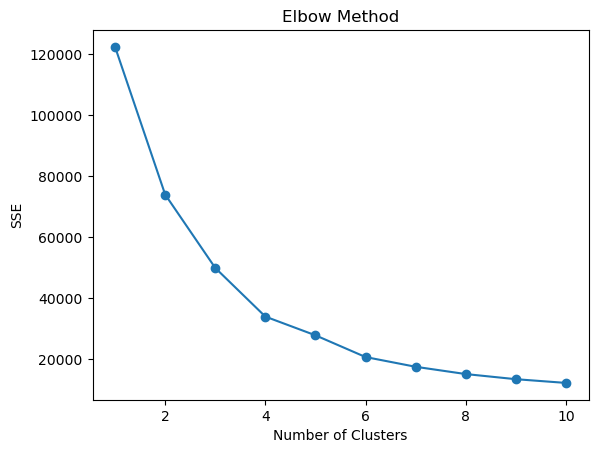

In [163]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency_Score', 'Frequency_Score', 'Monetary_Score']])

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=6, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [158]:
rfm_df

,Customer_ID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Cluster
0,10000,246,1,1498.69,3,1,4,314,4
1,10001,287,1,3879.54,2,1,4,214,1
2,10003,371,1,1890.74,1,1,4,114,1
3,10006,159,4,7115.49,4,3,5,435,2
4,10007,202,2,2868.76,3,2,4,324,2
...,...,...,...,...,...,...,...,...,...
40803,99993,185,1,195.46,3,1,2,312,0
40804,99994,223,2,2100.92,3,2,4,324,2
40805,99995,243,1,1552.72,3,1,4,314,4
40806,99996,442,2,3248.06,1,2,4,124,5


In [159]:
rfm_cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer_ID': 'count'
}).reset_index()

print(rfm_cluster_summary)


   Cluster     Recency  Frequency     Monetary  Customer_ID
0        0  206.789340   1.000392   463.683214         5103
1        1  389.663524   1.000000  1834.671678        13894
2        2  201.081633   2.292167  3169.192138         6664
3        3  389.241445   1.022234   269.178798         5757
4        4  207.682955   1.000000  2232.941706         5198
5        5  347.068719   2.138630  3045.961995         4191


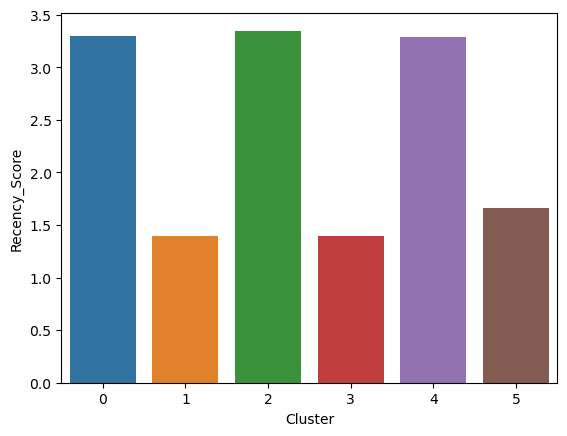

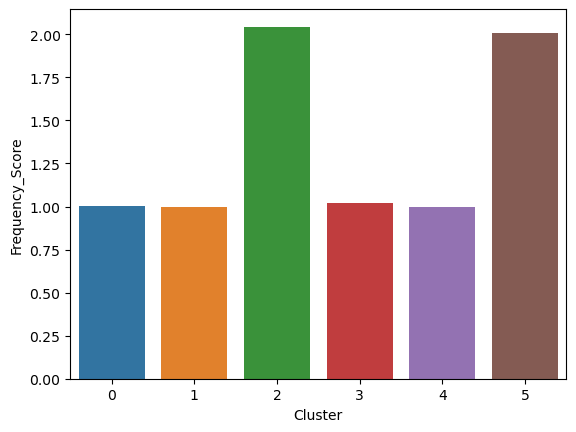

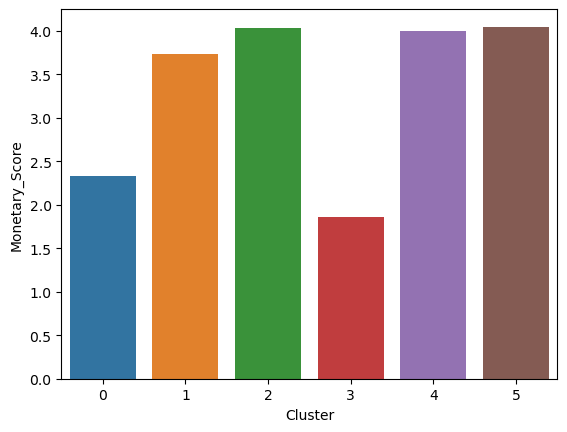

In [160]:
list1 = ['Recency_Score','Frequency_Score','Monetary_Score']

avg_df = rfm_df.groupby(['Cluster'], as_index = False).mean()
for i in list1:
    sns.barplot(x='Cluster', y = str(i), data = avg_df)
    plt.show()

In [166]:
kmeans_summary = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'std', 'min', 'max'],
    'Frequency': ['mean', 'std', 'min', 'max'],
    'Monetary': ['mean', 'std', 'min', 'max']
}).round(2)
kmeans_summary

Recency                  Frequency               Monetary           \
           mean    std  min  max      mean   std min max     mean      std   
Cluster                                                                      
0        206.79  36.93  144  270      1.00  0.02   1   2   463.68   274.53   
1        389.66  69.07  271  509      1.00  0.00   1   1  1834.67  1059.18   
2        201.08  36.15  144  270      2.29  0.57   2   7  3169.19  1946.03   
3        389.24  69.08  271  509      1.02  0.15   1   3   269.18   135.78   
4        207.68  36.58  144  270      1.00  0.00   1   1  2232.94   989.90   
5        347.07  55.66  271  508      2.14  0.38   2   5  3045.96  1684.53   

                            
             min       max  
Cluster                     
0          11.22    999.92  
1         500.61   9131.06  
2         105.41  16833.18  
3          10.30    499.89  
4        1000.90   9280.64  
5         500.90  11197.06

## Interpreting Cluster Characteristics
Based on the provided profiles of each cluster, we can describe each segment of customers as follows:

### Cluster Profiles:
1. **Cluster 0**
 - Average Recency: 206.9 days (purchased 6 months ago)
 - Average Frequency: 1 (infrequent buyers)
 - Average Monetary Score: 463.68 (somewhat low)
- Description: These customers purchased around 6 months ago but don't buy very often and have relatively low spending. They can be identified as **Low-Value Customers**.

2. **Cluster 1**
- Average Recency: 389.6 days (purchased almost a year ago)
- Average Frequency: 1 (infrequent buyers)
- Average Monetary Score: 1834.67 (medium spending)
- Description: These customers made a purchase almost a year ago, don't buy very often, but spend a moderate amount when they do. They can be identified as **Medium-Value At-Risk Customers**.

3. **Cluster 2**
- Average Recency: 201.08 days (purchased 6 months ago)
- Average Frequency: 2.29 (occasional buyers)
- Average Monetary Score: 3169.19 (high value)
- Description: These customers purchased around 6 months ago, make occasional purchases, and spend a lot when they do. They can be identified as **High-Value Customers**.

4. **Cluster 3**
- Average Recency: 389.24 days (purchased almost a year ago)
- Average Frequency: 1.02 (very infrequent buyers)
- Average Monetary Score: 269.18 (low spending)
- Description: These customers made a purchase almost a year ago, buy very infrequently, and have low spending. They can be identified as **Low-Value At-Risk Customers**.

5. **Cluster 4**
- Average Recency: 207.68 days (purchased 6 months ago)
- Average Frequency: 1 (infrequent buyers)
- Average Monetary Score: 2232.94 (high spending)
- Description: These customers purchased around 6 months ago, don't buy very often, but spend a significant amount when they do. They can be identified as **High-Value Customers** who spend significantly but purchase infrequently (Occasional High Spenders).

6. **Cluster 5**
- Average Recency: 347.07 days (purchased over a year ago)
- Average Frequency: 2.14 (occasional buyers)
- Average Monetary Score: 3045.96 (high spending)
- Description: These customers made a purchase over a year ago, make occasional purchases, and spend a lot when they do. They can be identified as **High-Value Loyal Customers**.